100%|██████████| 25.7M/25.7M [00:01<00:00, 21.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1
One-hot Encoding first 10 docs:
   10  15  1990  25  70  950  about  accustomed  acting  action
0   0   0     0   0   0    0      1           1       0       0
1   0   0     0   0   0    0      1           0       0       0
2   0   0     0   0   0    0      0           0       0       0
3   1   0     0   0   0    0      0           0       0       0
4   0   0     0   0   0    0      1           0       1       1
5   0   1     0   1   0    0      0           0       0       0
6   1   0     0   0   0    0      1           0       0       0
7   0   0     1   0   1    0      0           0       0       0
8   0   0     0   0   0    1      1           0       1       0
9   0   0     0   0   0    0      0           0       0       0

Top 17 words TF-IDF:
the      0.274442
and      0.126825
br       0.122562
of       0.111909
to       0.111339
is       0.106512
this     0.091545


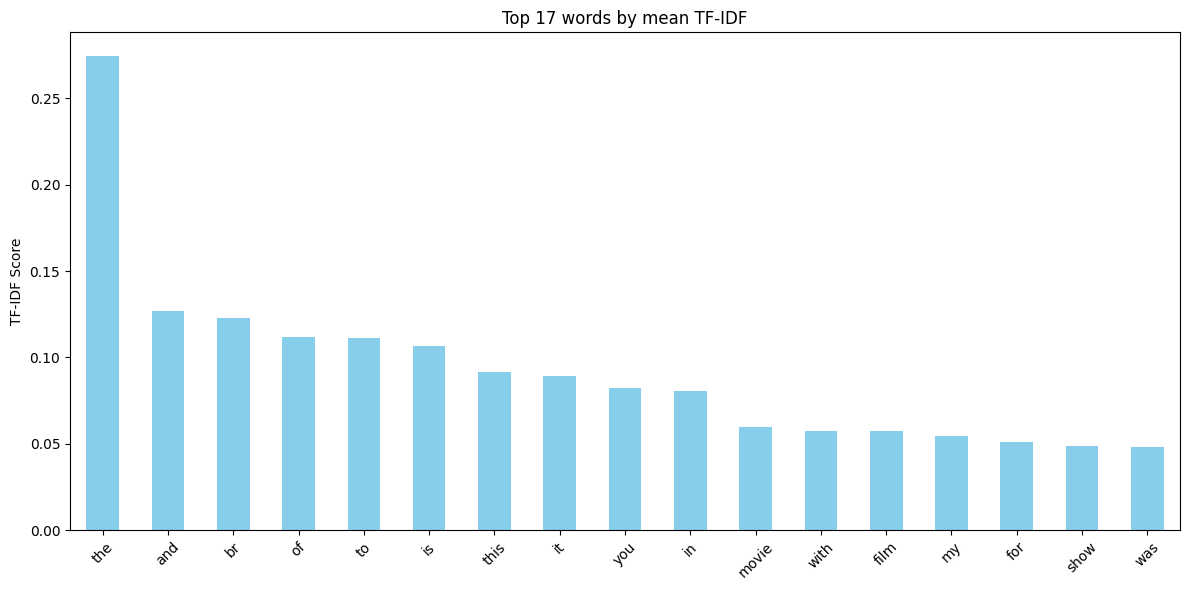

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to dataset files:", path)
df = pd.read_csv(path + "/IMDB Dataset.csv")


texts = df['review'][:10].values


count_vectorizer = CountVectorizer(binary=True)
one_hot = count_vectorizer.fit_transform(texts)
one_hot_df = pd.DataFrame(one_hot.toarray(), columns=count_vectorizer.get_feature_names_out())
print("One-hot Encoding first 10 docs:")
print(one_hot_df.iloc[:, :10])


tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


mean_tfidf = tfidf_df.mean(axis=0).sort_values(ascending=False)
top_words = mean_tfidf.head(17)


print("\nTop 17 words TF-IDF:")
print(top_words)


plt.figure(figsize=(12, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title("Top 17 words by mean TF-IDF")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
import spacy
from tqdm import tqdm


nlp = spacy.load("en_core_web_sm")


def preprocess_text_spacy(text):
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
   return tokens


N = 2500


processed_data = []
for text in tqdm(df.review[:N]):
 processed_data.append(preprocess_text_spacy(text.lower()))


Y = []
for label in tqdm(df.sentiment[:N]):
 Y.append(1 if label == 'positive' else 0)
print('preprocess done')
from gensim.models import Word2Vec


cbow_model = Word2Vec(sentences=processed_data, vector_size=100, window=5, min_count=5, sg=0)


skipgram_model = Word2Vec(sentences=processed_data, vector_size=100, window=5, min_count=5, sg=1)


cbow_model.save("cbow_model.model")
skipgram_model.save("skipgram_model.model")

NameError: name 'df' is not defined

In [ ]:
from gensim.models import Word2Vec


cbow_model = Word2Vec(sentences=processed_data, vector_size=100, window=5, min_count=5, sg=0)


skipgram_model = Word2Vec(sentences=processed_data, vector_size=100, window=5, min_count=5, sg=1)


cbow_model.save("cbow_model.model")
skipgram_model.save("skipgram_model.model")


def cosine_similarity(model, word1, word2):
   return model.wv.similarity(word1, word2)


print("CBOW:", cosine_similarity(cbow_model, "movie", "story"))
print("Skip-gram:", cosine_similarity(skipgram_model, "movie", "story"))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def plot_embeddings(model, words, model_name):
   if model_name == 'glove':
       vectors = np.array([model[word] for word in words])
   else:
       vectors = np.array([model.wv[word] for word in words])


   pca = PCA(n_components=2)
   reduced_vectors = pca.fit_transform(vectors)


   tsne = TSNE(n_components=2, perplexity=10)
   tsne_vectors = tsne.fit_transform(vectors)


   plt.figure(figsize=(10, 5))
   plt.subplot(1, 2, 1)
   plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
   for i, word in enumerate(words):
       plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
   plt.title(f"PCA {model_name}")


   plt.subplot(1, 2, 2)
   plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1])
   for i, word in enumerate(words):
       plt.annotate(word, (tsne_vectors[i, 0], tsne_vectors[i, 1]))
   plt.title(f"t-SNE {model_name}")


   plt.show()


top_words = list(cbow_model.wv.index_to_key[:20])

In [ ]:
import gensim.downloader as api
from gensim.models import FastText


glove_model = api.load("glove-wiki-gigaword-100")


fasttext_model = FastText(sentences=processed_data, vector_size=100, window=5, min_count=5)


fasttext_model.save("fasttext_model.model")
def cosine_similarity(model, word1, word2):
   return model.wv.similarity(word1, word2)


print("GloVe:", glove_model.similarity("movie", "story"))
print("FastText:", cosine_similarity(fasttext_model, "movie", "story"))

In [ ]:
plot_embeddings(cbow_model, top_words, 'cbow')
plot_embeddings(skipgram_model, top_words, 'skipgram')
plot_embeddings(fasttext_model, top_words, 'fastext')
plot_embeddings(glove_model, top_words, 'glove')

In [ ]:
import tensorflow.keras.backend as K


class GradientLogger(tf.keras.callbacks.Callback):
   def __init__(self):
       super().__init__()
       self.gradients = []


   def on_batch_end(self, batch, logs=None):


       batch_size = 64
       batch_input = x_train[batch * batch_size : (batch + 1) * batch_size]
       batch_target = y_train[batch * batch_size : (batch + 1) * batch_size]


       with tf.GradientTape() as tape:
           y_pred = self.model(batch_input, training=True)
           y_pred = tf.squeeze(y_pred, axis=-1)
           loss_fn = tf.keras.losses.get(self.model.loss)
           loss = loss_fn(batch_target, y_pred)


       gradients = tape.gradient(loss, self.model.trainable_variables)
       gradient_norms = [tf.norm(g).numpy() if isinstance(g, tf.IndexedSlices) else np.linalg.norm(g.numpy()) for g in gradients if g is not None]
       self.gradients.append(np.mean(gradient_norms))


grad_logger = GradientLogger()
model.fit(x_train, y_train, epochs=5, batch_size=64, callbacks=[grad_logger])


plt.plot(grad_logger.gradients)
plt.xlabel('Batches')
plt.ylabel('Gradient Norm')
plt.title('Vanishing Gradient Effect')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np


vocab_size = 10000
max_length = 200


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')


print(f"Training Data Shape: {x_train.shape}")
print(f"Testing Data Shape: {x_test.shape}")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


model = Sequential([
   Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
   SimpleRNN(64, return_sequences=False),
   Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RNN Training Accuracy')
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('RNN Training Loss')
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


dataset, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_data, test_data = dataset["train"], dataset["test"]


def preprocess_data(data, tokenizer, max_length=500):
   sequences, labels = [], []
   for text, label in data:
       tokenized_text = tokenizer.texts_to_sequences([text.numpy().decode('utf-8')])[0]
       sequences.append(tokenized_text)
       labels.append(label.numpy())


   sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')
   return np.array(sequences), np.array(labels)


tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts([text.numpy().decode('utf-8') for text, _ in train_data])


X_train, y_train = preprocess_data(train_data, tokenizer)
X_test, y_test = preprocess_data(test_data, tokenizer)


def create_model(model_type="LSTM"):
   model = tf.keras.Sequential([
       tf.keras.layers.Embedding(10000, 128, input_length=500),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.LSTM(64) if model_type == "LSTM" else tf.keras.layers.GRU(64),
       tf.keras.layers.Dense(1, activation='sigmoid')
   ])
   model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
   return model


lstm_model = create_model("LSTM")
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


gru_model = create_model("GRU")
gru_history = gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


def plot_history(history, model_name):
   plt.plot(history.history['accuracy'], label='Train Accuracy')
   plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
   plt.title(f'{model_name} Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.legend()
   plt.show()


plot_history(lstm_history, "LSTM")
plot_history(gru_history, "GRU")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np
import random


with open('shake.txt', "r", encoding="utf-8") as f:
   text = f.read().lower()


tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1


input_sequences = []
words = text.split()
for i in range(1, len(words)):
   n_gram_sequence = words[:i+1]
   encoded = tokenizer.texts_to_sequences([n_gram_sequence])[0]
   input_sequences.append(encoded)


max_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)


model = Sequential([
   Embedding(total_words, 128, input_length=max_length-1),
   LSTM(150, return_sequences=True),
   LSTM(100),
   Dense(100, activation='relu'),
   Dense(total_words, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X, y, epochs=50, verbose=1)


def generate_text(seed_text, next_words=50):
   for _ in range(next_words):
       token_list = tokenizer.texts_to_sequences([seed_text])[0]
       token_list = pad_sequences([token_list], maxlen=max_length-1, padding='pre')
       predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
       output_word = ""
       for word, index in tokenizer.word_index.items():
           if index == predicted:
               output_word = word
               break
       seed_text += " " + output_word
   return seed_text


print(generate_text("to be or not to be", next_words=50))

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense


vocabular = 12000
maxlen = 250


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocabular)


x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [ ]:
model_bilstm = Sequential([
   Embedding(vocabular, 128, input_length=maxlen),
   Bidirectional(LSTM(128, return_sequences=False)),
   Dense(1, activation='sigmoid')
])


model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history_bilstm = model_bilstm.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test, y_test))

In [ ]:
import matplotlib.pyplot as plt


def plot_training_diagram(history, title):
   plt.plot(history.history['accuracy'], label='training accuracy')
   plt.plot(history.history['val_accuracy'], label='validation accuracy')
   plt.title(title)
   plt.xlabel('Epoche')
   plt.ylabel('Accuracy')
   plt.legend()
   plt.show()


plot_training_diagram(history_bilstm, 'Bidirectional LSTM Accuracy')